# Data Analysis
## User-Item Interaction Analysis

This notebook performs comprehensive analytics on the recommendation system dataset
**TXT File** (`train-2.txt`) - Original format

## 1. Import Required Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

## 2. Verify Files

In [4]:
# File paths
txt_file = r'Dataset\data.txt'

## 3. Load TXT File Data

In [7]:
def load_txt_data(filepath):
    """Load user-item interaction data"""
    user_items = []
    with open(filepath, 'r') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            items = line.split()
            if len(items) < 2:
                continue
            user_id = int(items[0])
            item_list = [int(x) for x in items[1:]]
            user_items.append((user_id, item_list))
    return user_items

# Load TXT data
txt_data = load_txt_data(txt_file)
print(f"Loaded {len(txt_data):,} users from TXT file")

# Display first 5 users
print("\nFirst 5 users:")
for i in range(min(5, len(txt_data))):
    user_id, items = txt_data[i]
    print(f"User {user_id}: {len(items)} items - {items[:10]}")

Loaded 52,643 users from TXT file

First 5 users:
User 0: 17 items - [28261, 388, 5731, 401, 28284, 3570, 26806, 6802, 12212, 407]
User 1: 19 items - [31090, 27970, 27976, 25257, 38241, 31965, 39105, 31844, 13418, 38433]
User 2: 19 items - [670, 29839, 6075, 8259, 42167, 21676, 31953, 21645, 6604, 385]
User 3: 16 items - [40368, 32968, 23891, 784, 26829, 11208, 23811, 1905, 3170, 1715]
User 4: 16 items - [1376, 4962, 533, 1649, 8615, 26709, 31248, 1449, 10122, 34420]


## 4. User Interaction Statistics

In [9]:
# Calculate interaction counts
txt_interaction_counts = [len(items) for _, items in txt_data]

print("USER INTERACTION STATISTICS")
print("="*70)
print(f"\nTotal Users: {len(txt_data):,}")
print(f"\nInteraction Range:")
print(f"Minimum: {min(txt_interaction_counts)}")
print(f"Maximum: {max(txt_interaction_counts):,}")
print(f"Mean: {np.mean(txt_interaction_counts):.2f}")
print(f"Median: {np.median(txt_interaction_counts):.2f}")
print(f"Std Dev: {np.std(txt_interaction_counts):.2f}")

print(f"\nPercentile Analysis:")
for p in [10, 25, 50, 75, 90, 95, 99]:
    value = np.percentile(txt_interaction_counts, p)
    print(f"{p}th percentile: {value:.0f} interactions")

print(f"\nDistribution by Interaction Count:")
buckets = [(1, 10), (11, 50), (51, 100), (101, 200), (201, 500), (501, 1000), (1001, 5000), (5001, float('inf'))]
for min_val, max_val in buckets:
    count = sum(1 for c in txt_interaction_counts if min_val <= c <= max_val)
    percentage = (count / len(txt_interaction_counts)) * 100
    label = f"{min_val}-{max_val}" if max_val != float('inf') else f"{min_val}+"
    print(f"{label:12s}: {count:6,} users ({percentage:5.2f}%)")

USER INTERACTION STATISTICS

Total Users: 52,643

Interaction Range:
Minimum: 16
Maximum: 10,682
Mean: 45.22
Median: 26.00
Std Dev: 77.96

Percentile Analysis:
10th percentile: 16 interactions
25th percentile: 19 interactions
50th percentile: 26 interactions
75th percentile: 45 interactions
90th percentile: 88 interactions
95th percentile: 132 interactions
99th percentile: 294 interactions

Distribution by Interaction Count:
1-10        :      0 users ( 0.00%)
11-50       : 41,085 users (78.04%)
51-100      :  7,323 users (13.91%)
101-200     :  3,012 users ( 5.72%)
201-500     :  1,094 users ( 2.08%)
501-1000    :    116 users ( 0.22%)
1001-5000   :     12 users ( 0.02%)
5001+       :      1 users ( 0.00%)


## 5. Item Statistics

In [13]:
# Item statistics
txt_all_items = set()
txt_item_frequency = {}

for _, items in txt_data:
    for item in items:
        txt_all_items.add(item)
        txt_item_frequency[item] = txt_item_frequency.get(item, 0) + 1

txt_item_freqs = list(txt_item_frequency.values())

print("ITEM STATISTICS")
print("="*70)
print(f"\nTotal Unique Items: {len(txt_all_items):,}")
print(f"Item ID Range: {min(txt_all_items)} to {max(txt_all_items):,}")

print(f"\nItem Popularity Statistics:")
print(f"  Mean interactions per item: {np.mean(txt_item_freqs):.2f}")
print(f"  Median interactions per item: {np.median(txt_item_freqs):.2f}")
print(f"  Min interactions: {min(txt_item_freqs)}")
print(f"  Max interactions: {max(txt_item_freqs):,}")

print(f"\nTop 10 Most Popular Items:")
sorted_items = sorted(txt_item_frequency.items(), key=lambda x: x[1], reverse=True)[:10]
for rank, (item_id, freq) in enumerate(sorted_items, 1):
    print(f"{rank:2d}. Item {item_id:6d}: {freq:6,} interactions")

print(f"\nItem Popularity Distribution on origianl data:")
item_buckets = [(1, 5), (6, 10), (11, 50), (51, 100), (101, 180),(181, 500), (501, 1000), (1001, float('inf'))]
for min_val, max_val in item_buckets:
    count = sum(1 for f in txt_item_freqs if min_val <= f <= max_val)
    percentage = (count / len(txt_item_freqs)) * 100
    label = f"{min_val}-{max_val}" if max_val != float('inf') else f"{min_val}+"
    print(f"{label:12s}: {count:6,} items ({percentage:5.2f}%)")

ITEM STATISTICS

Total Unique Items: 91,599
Item ID Range: 6 to 91,604

Item Popularity Statistics:
  Mean interactions per item: 25.99
  Median interactions per item: 15.00
  Min interactions: 1
  Max interactions: 1,741

Top 10 Most Popular Items:
 1. Item    896:  1,741 interactions
 2. Item  43756:  1,389 interactions
 3. Item   7897:  1,244 interactions
 4. Item  36454:  1,156 interactions
 5. Item  36477:  1,137 interactions
 6. Item    900:  1,047 interactions
 7. Item  49144:  1,010 interactions
 8. Item   5790:    981 interactions
 9. Item  48177:    927 interactions
10. Item   1258:    920 interactions

Item Popularity Distribution on origianl data:
1-5         :  4,393 items ( 4.80%)
6-10        : 20,562 items (22.45%)
11-50       : 57,141 items (62.38%)
51-100      :  6,754 items ( 7.37%)
101-180     :  1,897 items ( 2.07%)
181-500     :    775 items ( 0.85%)
501-1000    :     70 items ( 0.08%)
1001+       :      7 items ( 0.01%)


## 6. Data Sparsity

In [15]:
txt_total_possible = len(txt_data) * len(txt_all_items)
txt_total_actual = sum(txt_interaction_counts)
txt_sparsity = (1 - txt_total_actual / txt_total_possible) * 100

print("DATA SPARSITY ANALYSIS")
print("="*70)
print(f"\nTotal Users: {len(txt_data):,}")
print(f"Total Items: {len(txt_all_items):,}")
print(f"Total Possible Interactions: {txt_total_possible:,}")
print(f"Total Actual Interactions: {txt_total_actual:,}")
print(f"\nData Sparsity: {txt_sparsity:.4f}%")
print(f"Data Density: {100-txt_sparsity:.4f}%")

DATA SPARSITY ANALYSIS

Total Users: 52,643
Total Items: 91,599
Total Possible Interactions: 4,822,046,157
Total Actual Interactions: 2,380,730

Data Sparsity: 99.9506%
Data Density: 0.0494%


## 7. Visualizations

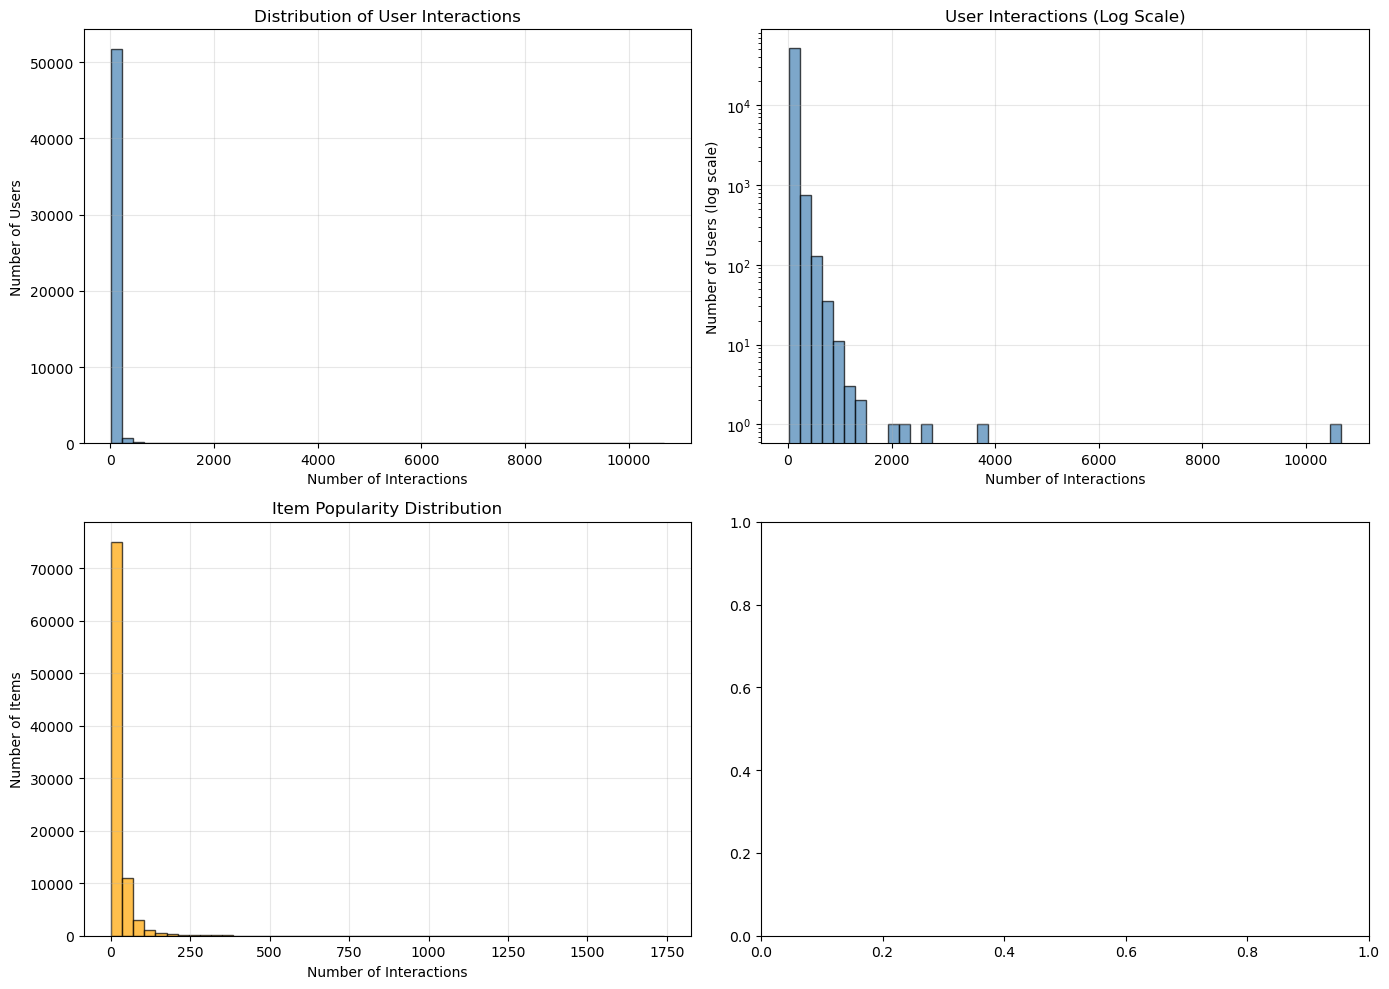

In [17]:
# Create comprehensive visualizations for data
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Histogram of user interactions
axes[0, 0].hist(txt_interaction_counts, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].set_xlabel('Number of Interactions')
axes[0, 0].set_ylabel('Number of Users')
axes[0, 0].set_title('Distribution of User Interactions')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Log-scale histogram
axes[0, 1].hist(txt_interaction_counts, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 1].set_xlabel('Number of Interactions')
axes[0, 1].set_ylabel('Number of Users (log scale)')
axes[0, 1].set_title('User Interactions (Log Scale)')
axes[0, 1].set_yscale('log')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Item popularity distribution
axes[1, 0].hist(txt_item_freqs, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1, 0].set_xlabel('Number of Interactions')
axes[1, 0].set_ylabel('Number of Items')
axes[1, 0].set_title('Item Popularity Distribution')
axes[1, 0].grid(True, alpha=0.3)

plt.tight_layout()
#plt.savefig('txt_analytics.png', dpi=300, bbox_inches='tight')
plt.show()

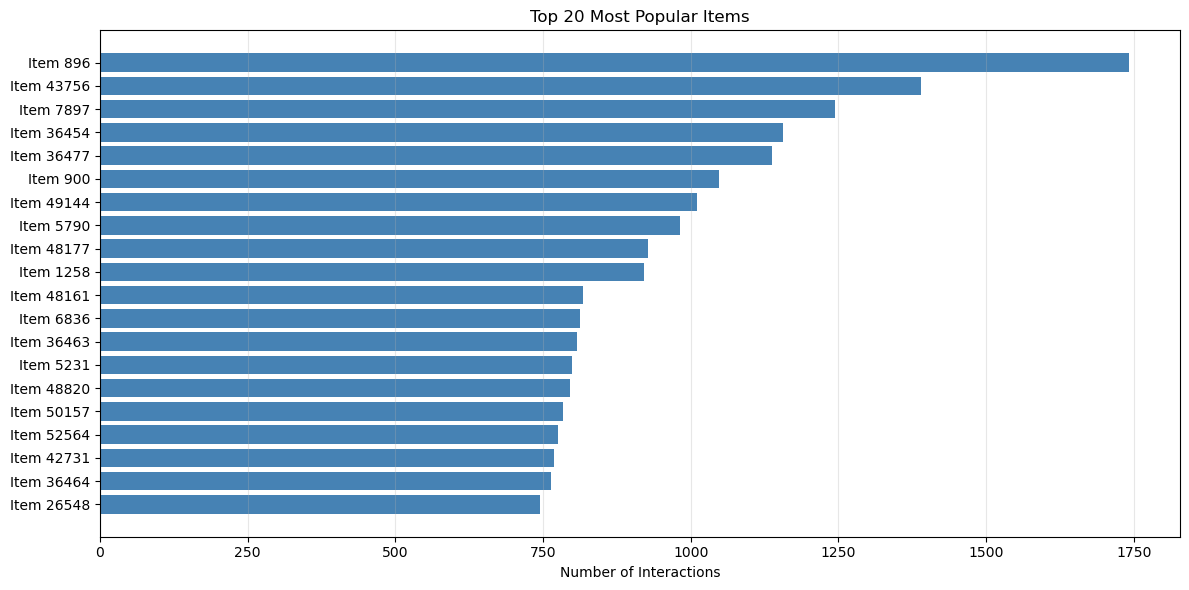

In [18]:
# Top items visualization
fig, ax = plt.subplots(figsize=(12, 6))
top_items = sorted(txt_item_frequency.items(), key=lambda x: x[1], reverse=True)[:20]
items = [f"Item {x[0]}" for x in top_items]
freqs = [x[1] for x in top_items]

ax.barh(items, freqs, color='steelblue')
ax.set_xlabel('Number of Interactions')
ax.set_title('Top 20 Most Popular Items')
ax.grid(True, alpha=0.3, axis='x')
ax.invert_yaxis()

plt.tight_layout()
plt.show()

In [20]:
from collections import Counter

# txt_data: list of (user_id, [item_ids])
# 1) Build a dict: user_id -> interaction_count
user_interaction_counts = {}
for u, items in txt_data:
    user_interaction_counts[u] = len(items)

print(f"Total users in full data: {len(user_interaction_counts)}")

# 2) Define segmentation
# Regular: 11–50
# Heavy:   51–200
# Extreme: >200
def get_user_segment(count: int):
    if 11 <= count <= 50:
        return "regular"
    elif 51 <= count <= 200:
        return "heavy"
    elif count > 200:
        return "extreme"
    else:
        return None   # <=10 interactions, treat as "ignored"/not segmented

# 3) Build mapping: user_id -> segment
user_segment = {}
for u, c in user_interaction_counts.items():
    seg = get_user_segment(c)
    if seg is not None:
        user_segment[u] = seg

# 4) Print distribution of segments
seg_counts = Counter(user_segment.values())
print("User segment distribution:")
for seg in ["regular", "heavy", "extreme"]:
    print(f"  {seg:7s}: {seg_counts.get(seg, 0):6d} users")

# Optional: build a small DataFrame for inspection
seg_df = pd.DataFrame(
    [(u, user_interaction_counts[u], user_segment.get(u, None))
     for u in user_interaction_counts.keys()],
    columns=["user_id", "interaction_count", "segment"]
)

seg_df.head()


Total users in full data: 52643
User segment distribution:
  regular:  41085 users
  heavy  :  10335 users
  extreme:   1223 users


,user_id,interaction_count,segment
0,0,17,regular
1,1,19,regular
2,2,19,regular
3,3,16,regular
4,4,16,regular


In [22]:
save_path = "user_segments.csv"
seg_df.to_csv(save_path, index=False)
print(f"Saved to {save_path}")

Saved to user_segments.csv


In [24]:
from collections import Counter

item_freq = Counter()

for u, items in txt_data:
    item_freq.update(items)

print(f"Total unique items: {len(item_freq)}")


Total unique items: 91599


In [26]:
def item_bucket(freq):
    if 1 <= freq <= 5: return "1-5"
    if 6 <= freq <= 10: return "6-10"
    if 11 <= freq <= 50: return "11-50"
    if 51 <= freq <= 100: return "51-100"
    if 101 <= freq <= 180: return "101-180"
    if 181 <= freq <= 500: return "181-500"
    if 501 <= freq <= 1000: return "501-1000"
    return "1001+"


In [28]:
from collections import defaultdict

segment_bucket_counts = {
    "regular": Counter(),
    "heavy": Counter(),
    "extreme": Counter()
}

for u, items in txt_data:
    seg = user_segment.get(u, None)
    if seg is None:
        continue
    for i in items:
        segment_bucket_counts[seg][item_bucket(item_freq[i])] += 1


In [30]:
for seg in ["regular", "heavy", "extreme"]:
    total = sum(segment_bucket_counts[seg].values())
    print(f"\n--- {seg.upper()} --- Total interactions: {total}")
    for b, c in segment_bucket_counts[seg].items():
        print(f"{b:7s}: {c:6d} ({c/total*100:.2f}%)")



--- REGULAR --- Total interactions: 1042516
11-50  : 511033 (49.02%)
101-180: 113560 (10.89%)
51-100 : 201862 (19.36%)
181-500: 101043 (9.69%)
6-10   :  78799 (7.56%)
501-1000:  23656 (2.27%)
1-5    :   7629 (0.73%)
1001+  :   4934 (0.47%)

--- HEAVY --- Total interactions: 918658
51-100 : 182023 (19.81%)
181-500:  77436 (8.43%)
101-180:  93918 (10.22%)
11-50  : 475350 (51.74%)
6-10   :  65258 (7.10%)
501-1000:  16662 (1.81%)
1001+  :   3067 (0.33%)
1-5    :   4944 (0.54%)

--- EXTREME --- Total interactions: 419556
11-50  : 237681 (56.65%)
51-100 :  80250 (19.13%)
101-180:  37241 (8.88%)
181-500:  24093 (5.74%)
6-10   :  33785 (8.05%)
501-1000:   4193 (1.00%)
1-5    :   1590 (0.38%)
1001+  :    723 (0.17%)
